Họ tên : Hoàng Tiến Anh 

MSSV : 21068521

STT : 03

# ĐỀ KIỂM TRA CUỐI KỲ
## Học phần: Tối ưu hoá cho Khoa học dữ liệu
## Ngày: 16/12/2023
## Lớp: DHKHDL17A. Thời gian: 75 phút

Câu 1. (6 điểm) Cho ma trận $A=\begin{bmatrix}1 & 0\\ 0 & -4 \end{bmatrix}$ và vector $b=(2;2)$. Xét bài toán tối ưu sau 
$$\min_{x\in\mathbb{R}^2}f(x)=\dfrac{1}{2}\|Ax-b\|_2^2.$$

a) (2 điểm) Xác định điểm tối ưu $x^*$ và giá trị tối ưu $p^*$ của bài toán trên.

b) (2 điểm) Sử dụng thuật toán Gradient Descent, với giá trị $x$ ban đầu là $x^{(0)}=(-1;2)$, sử dụng learning rate lần lượt là $\dfrac{1}{7}$ và $\dfrac{1}{10}$ và thực hiện tối đa $100$ vòng lặp. In ra giá trị của $x^{(k)}$, $f(x^{(k)})$ tương ứng sau mỗi vòng lặp $k$ và vẽ đồ thị biểu thị cho sai số $|f(x^{(k)})-p^*|$ trong cả hai trường hợp của learning rate. Từ đó hãy đưa ra kết luận về sự hội tụ của thuật toán Gradient Descent trong từng trường hợp của learning rate.

c) (1 điểm) Tìm điều kiện cụ thể cho learning rate để thuật toán Gradient Descent của bài toán trên hội tụ.

d) (1 điểm) Trả lời câu a) với ma trận $A=\begin{bmatrix}1 & -2\\ 2 & -4 \end{bmatrix}$ và vector $b=(2;2)$.


In [2]:
import numpy as np

Ta có thể thấy đây là hàm tối ưu của bài toán Linear regression

$\nabla f(x) = A^TAx - A^Tb$

Để tìm điểm tối ưu của bài toán thì ta cần tính $\nabla f(x) = 0 \implies A^TAx - A^Tb = 0 $

=> $ A^TAx = A^Tb $ 

In [68]:
A = np.array([[1,0],[0,-4]])
b = np.array([[2,2]]).T
print("Định thức của A là ",np.linalg.det(A))

Định thức của A là  -4.0


Định thức của |A| = -4 => A khả nghịch => $ x = A^{-1} (A^T)^{-1}A^Tb = A^{-1}b$

In [69]:
x = np.linalg.inv(A)@b
print("Vậy điểm tối ưu của bài toán là : \n",x)

Vậy điểm tối ưu của bài toán là : 
 [[ 2. ]
 [-0.5]]


In [70]:
(A@x-b)

array([[0.],
       [0.]])

In [71]:
print("Giá trị tối ưu của bài toán là : ",np.linalg.norm(A@x-b)**2/2)

Giá trị tối ưu của bài toán là :  0.0


$\nabla f(x) = A^TAx - A^Tb$

b) (2 điểm) Sử dụng thuật toán Gradient Descent, với giá trị $x$ ban đầu là $x^{(0)}=(-1;2)$, sử dụng learning rate lần lượt là $\dfrac{1}{7}$ và $\dfrac{1}{10}$ và thực hiện tối đa $100$ vòng lặp. In ra giá trị của $x^{(k)}$, $f(x^{(k)})$ tương ứng sau mỗi vòng lặp $k$ và vẽ đồ thị biểu thị cho sai số $|f(x^{(k)})-p^*|$ trong cả hai trường hợp của learning rate. Từ đó hãy đưa ra kết luận về sự hội tụ của thuật toán Gradient Descent trong từng trường hợp của learning rate.


In [80]:
import numpy as np

# Hàm số mục tiêu
def objective_function(x):
    return np.linalg.norm(A@x-b)/2

# Đạo hàm của hàm số mục tiêu
def gradient(x):
    return A.T @ A @ x - A.T@b

def gradient_descent(lr, max_iterations, x0):
    xt = x0
    for i in range(max_iterations):
        x_new = xt - lr*gradient(xt)
        print(f"Lần lặp thứ {i} : x = {x_new} , f(x) = {objective_function(x_new)}")
        if abs(gradient(x_new)).all() < 1e-3:
            break
        xt = x_new
    return xt

learning_rate = 1/7
max_iterations = 100
initial_x = np.array([-1,2])

final_x = gradient_descent(learning_rate, max_iterations, initial_x)
print("Giá trị x cuối cùng sau Gradient Descent:", final_x)
print("Giá trị f(x) tương ứng:", objective_function(final_x))

Lần lặp thứ 0 : x = [[ 3.42857143 -4.28571429]
 [ 0.85714286 -6.85714286]] , f(x) = 9.2394451640115
Lần lặp thứ 1 : x = [[  3.06122449 -10.16326531]
 [  1.59183673   4.89795918]] , f(x) = 23.71128225737794
Lần lặp thứ 2 : x = [[  4.0058309    4.95043732]
 [ -0.29737609 -25.32944606]] , f(x) = 60.95345658907408
Lần lặp thứ 3 : x = [[  1.57684298 -33.91336943]
 [  4.56059975  52.39816743]] , f(x) = 156.73029830491203
Lần lặp thứ 4 : x = [[   7.82281192   66.02213363]
 [  -7.93133813 -147.4728387 ]] , f(x) = 403.0179819704694
Lần lặp thứ 5 : x = [[  -8.23825107 -190.95487424]
 [  24.19078785  366.48117706]] , f(x) = 1036.3308705398674
Lần lặp thứ 6 : x = [[  33.0616252   469.84314602]
 [ -58.40896468 -955.11486346]] , f(x) = 2664.85038875444
Lần lặp thứ 7 : x = [[  -73.13805663 -1229.35176323]
 [  153.99039897  2443.27495502]] , f(x) = 6852.472264423657
Lần lặp thứ 8 : x = [[  199.9468395   3140.00657483]
 [ -392.17939328 -6295.44172108]] , f(x) = 17620.642901960036
Lần lặp thứ 9 : x = [[

In [81]:
import numpy as np

# Hàm số mục tiêu
def objective_function(x):
    return np.linalg.norm(A@x-b)/2

# Đạo hàm của hàm số mục tiêu
def gradient(x):
    return A.T @ A @ x - A.T@b

def gradient_descent(lr, max_iterations, x0):
    xt = x0
    for i in range(max_iterations):
        x_new = xt - lr*gradient(xt)
        print(f"Lần lặp thứ {i} : x = {x_new} , f(x) = {objective_function(x_new)}")
        if abs(gradient(x_new)).all() < 1e-3:
            break
        xt = x_new
    return xt

learning_rate = 1/10
max_iterations = 100
initial_x = np.array([-1,2])

final_x = gradient_descent(learning_rate, max_iterations, initial_x)
print("Giá trị x cuối cùng sau Gradient Descent:", final_x)
print("Giá trị f(x) tương ứng:", objective_function(final_x))

Lần lặp thứ 0 : x = [[ 2.1 -2.4]
 [ 0.3 -4.2]] , f(x) = 5.414101956926928
Lần lặp thứ 1 : x = [[ 1.95 -4.8 ]
 [ 0.6   0.6 ]] , f(x) = 8.090310562642205
Lần lặp thứ 2 : x = [[ 2.175 -1.2  ]
 [ 0.15  -6.6  ]] , f(x) = 12.114847553725145
Lần lặp thứ 3 : x = [[ 1.8375 -6.6   ]
 [ 0.825   4.2   ]] , f(x) = 18.15850889562522
Lần lặp thứ 4 : x = [[  2.34375   1.5    ]
 [ -0.1875  -12.     ]] , f(x) = 27.228583362950147
Lần lặp thứ 5 : x = [[  1.584375 -10.65    ]
 [  1.33125   12.3     ]] , f(x) = 40.836753567032396
Lần lặp thứ 6 : x = [[  2.7234375   7.575    ]
 [ -0.946875  -24.15     ]] , f(x) = 61.25104892377518
Lần lặp thứ 7 : x = [[  1.01484375 -19.7625    ]
 [  2.4703125   30.525     ]] , f(x) = 91.8738523035313
Lần lặp thứ 8 : x = [[  3.57773438  21.24375   ]
 [ -2.65546875 -51.4875    ]] , f(x) = 137.8089643617386
Lần lặp thứ 9 : x = [[ -0.26660156 -40.265625  ]
 [  5.03320313  71.53125   ]] , f(x) = 206.7122371354043
Lần lặp thứ 10 : x = [[   5.49990234   51.9984375 ]
 [  -6.4998046

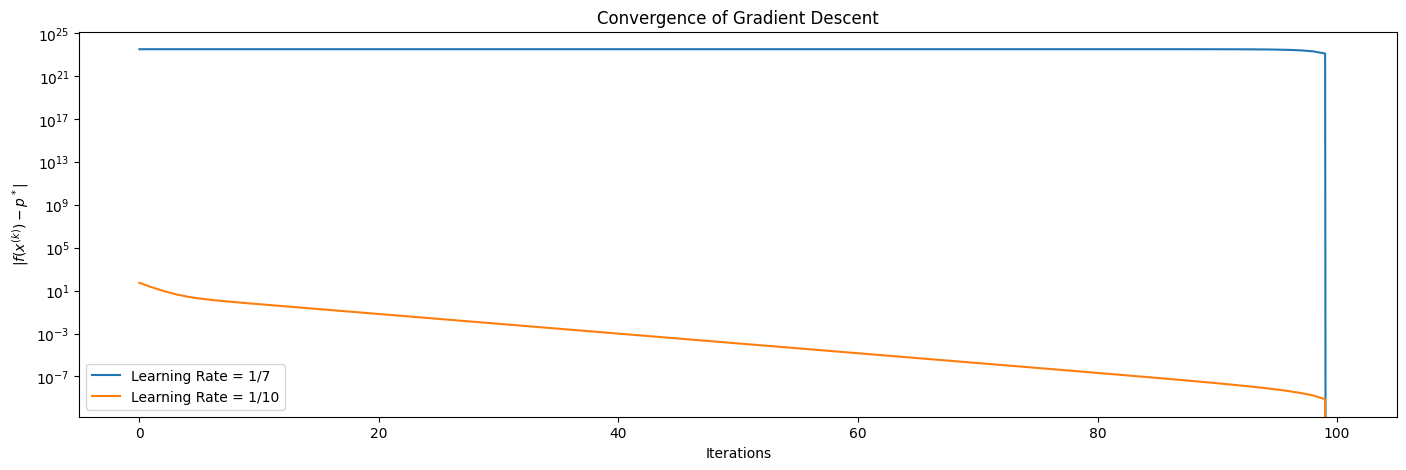

In [84]:
#b)
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1, 0], [0, -4]])
b = np.array([2, 2])

def f(x):
    return 0.5 * np.linalg.norm(A @ x - b)**2

def gradient_f(x):
    return A.T @ (A @ x - b)

def gradient_descent(initial_x, learning_rate, max_iterations):
    x = initial_x
    x_values = [x]
    f_values = [f(x)]

    for k in range(max_iterations):
        x = x - learning_rate * gradient_f(x)
        x_values.append(x)
        f_values.append(f(x))

    return np.array(x_values), np.array(f_values)



x_values_lr_1_7, f_values_lr_1_7 = gradient_descent(np.array([-1, 2]), 1/7, 100)

x_values_lr_1_10, f_values_lr_1_10 = gradient_descent(np.array([-1, 2]), 1/10, 100)

plt.figure(figsize=(17, 5))
plt.plot(np.abs(f_values_lr_1_7 - f(x_values_lr_1_7[-1])), label='Learning Rate = 1/7')
plt.plot(np.abs(f_values_lr_1_10 - f(x_values_lr_1_10[-1])), label='Learning Rate = 1/10')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('$|f(x^{(k)}) - p^*|$')
plt.title('Convergence of Gradient Descent')
plt.legend()
plt.show()

Nhận xét : Ta thấy lr = 1/10 thì đồ thị sẽ giảm dần theo số lần lặp , nên bài toán có thể hội tụ tốt hơn , chính xác hơn


c) (1 điểm) Tìm điều kiện cụ thể cho learning rate để thuật toán Gradient Descent của bài toán trên hội tụ.

Điều kiện cụ thể để thuật toán Gradient Descent hội tụ trong trường hợp hàm mục tiêu là hàm lồi là: learning rate $\eta$ phải thỏa mãn điều kiện:

$$0 < \eta < \dfrac{2}{\lambda_{\text{max}}(A^TA)},$$

trong đó $\lambda_{\text{max}}(A^TA)$ là eigenvalue lớn nhất của ma trận $A^TA$.

Với ma trận $A=\begin{bmatrix}1 & 0\\ 0 & -4 \end{bmatrix}$, ta có $A^TA = \begin{bmatrix}1 & 0\\ 0 & 16 \end{bmatrix}$. Eigenvalues của ma trận này là $1$ và $16$. Do đó, eigenvalue lớn nhất là $16$.

Từ điều kiện trên, ta có:

$$0 < \eta < \dfrac{2}{16} = \dfrac{1}{8}.$$

Vậy, để thuật toán Gradient Descent hội tụ trong trường hợp của ma trận $A$ đã cho, learning rate $\eta$ cần phải nhỏ hơn $\frac{1}{8}$.



d) (1 điểm) Trả lời câu a) với ma trận $A=\begin{bmatrix}1 & -2\\ 2 & -4 \end{bmatrix}$ và vector $b=(2;2)$.

In [72]:
A = np.array([[1,-2],[2,-4]])
b = np.array([[2,2]]).T
print("Định thức của A là ",np.linalg.det(A))

Định thức của A là  0.0


In [73]:
A.T@A

array([[  5, -10],
       [-10,  20]])

Ta có : Det(A) = 0 => A không khả nghịch , ta có thể giả khả nghịch : $ A^TA + \epsilon I $

$\displaystyle \lim_{\epsilon -> 0 } A^TA + \epsilon I = A^T A $

$ x = (\displaystyle \lim_{\epsilon -> 0 } A^TA + \epsilon I)^{-1} A^Tb$



In [74]:
lim = np.array([[5.0001,-10],[-10,20]])
x = np.linalg.inv(lim)@(A.T)@b

In [76]:
print("Vậy nghiệm tối ưu của bài toán là : \n",x)
print("Giá trị tối ưu của bài toán là : ",np.linalg.norm(A@x-b)**2/2)

Vậy nghiệm tối ưu của bài toán là : 
 [[ 0. ]
 [-0.6]]
Giá trị tối ưu của bài toán là :  0.39999999999999997


Câu 2. (4 điểm) Cho ma trận $A=\begin{bmatrix}1 & 0 & 0\\ 0 & 2 & 0 \\ 0 & 0 & 3 \end{bmatrix}$ và vector $b=(1/2;1; 3/2)$. Xét bài toán tối ưu sau $$\begin{align}
\min_{x=(x_1,x_2,x_3)\in\mathbb{R}^3}\;\;\; &f_0(x)=\sum_{i=1}^3x_i\log x_i\\
\text{subject to }\;\;\; & Ax\geq b, \quad\quad\quad\quad \quad (1) \\
& \mathbf{1}^Tx=\dfrac{3}{2}.
\end{align}$$

a) (1 điểm) Xác định hàm Lagrange $L(x,\lambda,v)$ cho bài toán $(1)$.

b) (2 điểm) Gọi $x^*$ và $(\lambda^*, v^*)$ lần lượt là điểm tối ưu của bài toán $(1)$ và bài toán đối ngẫu của nó. Viết điều kiện Karush-Kuhn-Tucker (KKT) cho $x^*$ và $(\lambda^*, v^*)$.

c) (1 điểm) Tìm một giá trị của $x^*$ và $(\lambda^*, v^*)$ thoả điều kiện KKT vừa tìm được ở câu b), từ đó đưa ra giá trị tối ưu cho bài toán $(1)$.

Lưu ý: sinh viên hoàn thành Câu 2 theo mẫu dưới đây.

a) Hàm Lagrange $L_(x,\lambda, \nu) = f_0(x) + \displaystyle \sum_{i=1}^m \lambda_i f_i(x) + \sum_{i=1}^p \nu_i h_i(x)$

$ L_(x,\lambda, \nu) = \sum_{i=1}^3x_i\log x_i - \lambda^T (Ax -b) + \nu (\mathbf{1}^Tx - \dfrac{3}{2}) $


b) Điều kiện KKT

(i) $ \lambda^* \geq 0 $ 

(ii) $ (\lambda^*)^T (Ax^* - b) = 0  $

(iii) $ (Ax^* - b) \geq 0  $

(iv) $ \mathbf{1}^Tx^* = \frac{3}{2} $

(v) $ \nabla_x L(x^*, \lambda^*, v^*) = \mathbf{0} $

$$ \frac{\partial L}{\partial x_i} = 1 + \log x_i + \lambda^T A_i + v = 0 $$


c) Giải hệ 5 phương trình tìm được ở câu b)



Đặt $\lambda^* = \begin{bmatrix} \lambda_1^* \\ \lambda_2^* \\ \lambda_3^* \end{bmatrix}$

Điều kiện $\lambda^* (Ax^* - b) = 0$ yêu cầu $\lambda_i^* (Ax^* - b)_i = 0$ với $i = 1,2,3$, tức là $\lambda_i^* \cdot 0 = 0$ với $i = 1,2,3$, do $Ax^* - b = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}$.

Do đó, các $\lambda_i^*$ có thể là bất kỳ giá trị không âm nào. Chúng ta có thể chọn các giá trị $\lambda_i^* = 0$ và sau đó tìm giá trị của $x^*$ từ điều kiện $x_1^* + x_2^* + x_3^* = \frac{3}{2}$.

Với $\lambda_i^* = 0$ với $i = 1,2,3$, ta có:

$ x_1^* + x_2^* + x_3^* = \frac{3}{2} $

Giả sử $x_1^* = \frac{1}{2}$ và $x_2^* = 1$, từ đó $x_3^* = \frac{3}{2} - x_1^* - x_2^* = \frac{1}{2}$.

Vậy một giải pháp thoả mãn điều kiện KKT là $x^* = \left(\frac{1}{2}, 1, \frac{1}{2}\right)$ và $\lambda^* = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}$.

$ \begin{equation}
x_i^* = \frac{1}{e^{a_i^T \lambda^* + v^* + 1}}, \quad i = 1, \dots, n
\end{equation}
$

## --------------------------------------- Hết --------------------------------------

### Lưu ý: sinh viên không được sử dụng internet. Giám thị không giải thích gì thêm.